# Exploratory Data Analysis: ANZ Synthesized 3-month Transactional Dataset


## Background

Source: https://www.theforage.com/modules/ZLJCsrpkHo9pZBJNY/BiJPfqmGY2QwgN6gA

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions. The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights gathered from the activities will be genuine.

## Step 0: Loading the dataset

In [66]:
# These are the necessary Python libraries to perform EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# referencing the csv file as file
file = 'DATA/ANZ-synthesized-transactions.csv'
# Read file and parse timestamp as the index
df = pd.read_csv(file, index_col=0, parse_dates=True)

In [3]:
# To display the first 5 rows of the data
df.head()

,status,card_present_flag,first_name,age,gender,txn_description,balance,amount,geometry,X,Y,merch_suburb,merch_state,merch_geometry,merch_X,merch_Y,distance
timestamp,,,,,,,,,,,,,,,,,
2018-08-01 01:01:15+00:00,authorized,1.0,Diana,26,F,POS,35.39,16.25,153.41 -27.95,-27.95,153.41,Ashmore,QLD,153.38 -27.99,-27.99,153.38,5.34
2018-08-01 01:13:45+00:00,authorized,0.0,Diana,26,F,SALES-POS,21.20,14.19,153.41 -27.95,-27.95,153.41,Sydney,NSW,151.21 -33.87,-33.87,151.21,691.63
2018-08-01 01:26:15+00:00,authorized,1.0,Michael,38,M,POS,5.71,6.42,151.23 -33.94,-33.94,151.23,Sydney,NSW,151.21 -33.87,-33.87,151.21,8.01
2018-08-01 01:38:45+00:00,authorized,1.0,Rhonda,40,F,SALES-POS,2117.22,40.90,153.10 -27.66,-27.66,153.10,Buderim,QLD,153.05 -26.68,-26.68,153.05,109.20
2018-08-01 01:51:15+00:00,authorized,1.0,Diana,26,F,SALES-POS,17.95,3.25,153.41 -27.95,-27.95,153.41,Mermaid Beach,QLD,153.44 -28.06,-28.06,153.44,12.60


In [4]:
# check the shape of the DataFrame
df.shape

(12043, 17)

* Rows in dataset: 12043
* Columns in dataset: 21

In [5]:
# confirmation of existing columns of file on load
df.columns


Index(['status', 'card_present_flag', 'first_name', 'age', 'gender',
       'txn_description', 'balance', 'amount', 'geometry', 'X', 'Y',
       'merch_suburb', 'merch_state', 'merch_geometry', 'merch_X', 'merch_Y',
       'distance'],
      dtype='object')

In [6]:
# confirmation of data types prior to conversion
df.dtypes

status                object
card_present_flag    float64
first_name            object
age                    int64
gender                object
txn_description       object
balance              float64
amount               float64
geometry              object
X                    float64
Y                    float64
merch_suburb          object
merch_state           object
merch_geometry        object
merch_X              float64
merch_Y              float64
distance              object
dtype: object

## Step 1: Data Wrangling

* It is important that data can be parsed for a variety of downstream purposes. 
* The data below will be converted into the appropriate data types for assuring data quality and usefulness.
* The guidelines for the conversion are laid out in the data dictionary. Please refer to readme.md file

### Dealing with missing values

In [7]:
# display all missing values
df.isna().sum()

status                  0
card_present_flag    4326
first_name              0
age                     0
gender                  0
txn_description         0
balance                 0
amount                  0
geometry                0
X                       0
Y                       0
merch_suburb         4326
merch_state          4326
merch_geometry       4326
merch_X                 0
merch_Y                 0
distance                0
dtype: int64

* All the columns missing values such as card_present_cat, merch_suburb, merch_state and merch geometry as displayed above all have trasitive dependencies with status, such that the value posted determines a null value for these columns. Several options can be considered:
  * Removing the rows: This task prioritizes a time series analysis for the transactions so removing the rows will not be preferable as that would remove valuable data we want to keep
  * Filling missing values with 0: This is a good choice given that all of the columns with missing values would not be affected by this change. This is because these columns a trasitively dependent on status, therefore not causing any conflicts for the analysis. Card_present_cat field will also not be affected by the insertion of more 0s as it is still treated as False when converted to Boolean, which is done in the following code executions.


In [8]:
# fill missing columns with 0
df.fillna(0, inplace=True)

In [9]:
# check if all missing values have been replaced
df.isna().sum()

status               0
card_present_flag    0
first_name           0
age                  0
gender               0
txn_description      0
balance              0
amount               0
geometry             0
X                    0
Y                    0
merch_suburb         0
merch_state          0
merch_geometry       0
merch_X              0
merch_Y              0
distance             0
dtype: int64

### Data type conversion

In [10]:
# convert status into categorical data type
s = pd.CategoricalDtype(categories=['authorized', 'posted'], ordered=True)
df.status = df.status.astype(s)

In [11]:
# convert card_present_cat into category data type with values 1 and 0
cpc = pd.CategoricalDtype(categories=[1, 0], ordered=True)
df.card_present_flag = df.card_present_flag.astype(cpc)

In [12]:
# convert gender into category data type with values M and F
g = pd.CategoricalDtype(categories=['M', 'F'], ordered=True)
df.gender = df.gender.astype(g)

In [13]:
# convert age into int32 data type
df.age = df.age.astype('int32')

In [14]:
# convert txn_description field into category data type
td = pd.CategoricalDtype(categories=['POS','SALES-POS','PAYMENT','INTER BANK','PAY/SALARY','PHONE BANK'], ordered=True)
df.txn_description = df.txn_description.astype(td)

In [15]:
# Replacing unknown values in distance field with 0s and converting type to float
df.distance.replace('#NUM!', 0, inplace=True)
df.distance = df.distance.astype('float64', errors='raise')

In [16]:
# Create new feature for card present flag in Boolean terms
b = pd.BooleanDtype()
df['card_present_bool'] = df.card_present_flag.astype(b)

In [17]:
# check all data types have been converted correctly
df.dtypes

status               category
card_present_flag    category
first_name             object
age                     int32
gender               category
txn_description      category
balance               float64
amount                float64
geometry               object
X                     float64
Y                     float64
merch_suburb           object
merch_state            object
merch_geometry         object
merch_X               float64
merch_Y               float64
distance              float64
card_present_bool     boolean
dtype: object

## Step 2: Overview

a. What is the average transaction amount?

* In order to measure the central tendency, some descriptive statistics should help to determine the best metric

In [18]:
# Generate summary statistics for amount
df.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

* The above summary suggests that there is a heavy amount of positive skew for this distrbitution. It is also quite excessively leptokurtic on a normal scale, meaning that a log transformation should probably be applied to smooth the distribution.

In [19]:
# check for skew on untransformed amount data
df.amount.skew()

5.356266394770427

In [20]:
# transform amount series into a log scale
amount_log = np.log(df.amount)
amount_log.skew()

1.4091072595935499

* The log transformation managed to reduce skewness from 5.356266394770427 to 1.4091072595935499. As skewness is not 0, the mean is not a very good measure of central tendency.
* Plotting a histogram with seaborn can give a good visualisation of the amounts.

<AxesSubplot:xlabel='amount', ylabel='Count'>

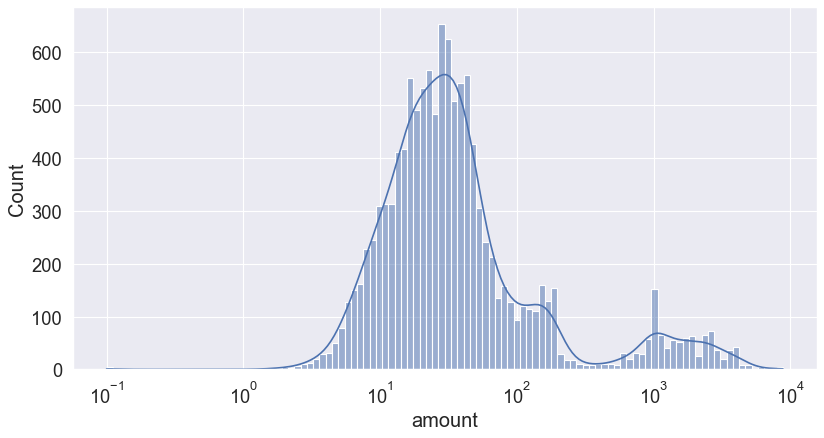

In [21]:
# Make a figure using matplotlib
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
# set font size in sns
sns.set(font_scale=1.5)
# plot a histogram using an adjusted logscale and probability density curve
sns.histplot(data=df, x='amount', log_scale=True, kde=True)

* The above logarithmically scaled distribution demonstrates that transactions at small amounts tend to peak very quickly at **~\$30 AUD**, after decaying gradually up to **~\$1000 AUD**, it tends to have a slight peak again. The shape of the graph tends to be a little bimodal, suggesting that other variables like income class may be influencing this distribution

In [22]:
# Calculate mean amount
df.amount.mean()

187.93358797641767

In [23]:
# Calculate median amount
df.amount.median()

29.0

In [24]:
# Calculate mode
df.amount.mode()

0    33.0
dtype: float64

* Since there is a large discrepency between the mean and median, as well as mean and mode. The median seems to be quite an accurate measure of central tendency
* Hence the average transaction amount seems to be **\$29.00 AUD**

b. How many transactions do customers make each month, on average?

In [25]:
# Create column segment for month name from index
df['month'] = df.index.month_name()
# create catogorical data type m
m = pd.CategoricalDtype(categories=['August', 'September', 'October'], ordered=True)
# type cast month column as category
df.month = df.month.astype(m)
# check data type conversion is correct
df.month.dtype

CategoricalDtype(categories=['August', 'September', 'October'], ordered=True)

In [26]:
# group monthly data by count of values and sort
x = df.month.value_counts().sort_values()
# display values
print(x)

August       3943
September    4013
October      4087
Name: month, dtype: int64


* Above data show that transaction volume has increased steadily over the months

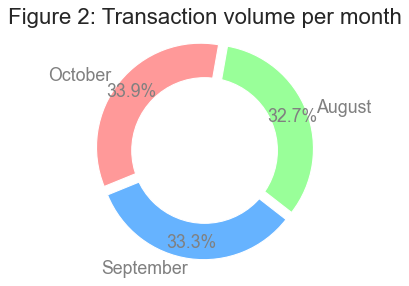

In [27]:

# plot frequency of some observations using pie chart
labels = df.month.value_counts().index
frequency = df.month.value_counts()

# ensure enough spacing between sections for sparse aesthetic
explode = (0.05, 0.05, 0.05)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Draw pie plot
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=80)
patches, texts, autotexts = ax1.pie(frequency, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=80, pctdistance=0.85, textprops={'fontsize': 16})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')

# add title
plt.title('Figure 2: Transaction volume per month', fontsize=20)

# Make text grey
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')

# Draw circle to make donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display plot
plt.show()

* the pie chart above shows that the percentage differences among transactions of the different months are relatively trivial. It is hard to tell the behvaiour of transaction volume in the future due to the insufficient data provided in the dataset.

In [28]:
# Get monthly mean of transaction amounts
print('Monthly mean of transaction amounts: $%.2f' % x.mean())

Monthly mean of transaction amounts: $4014.33


## Step 3: Time-series analysis and segmentation

In [29]:
# Create column segment for date from index
df['date'] = df.index.date
# Create column segment for day of month from index
df['dayofmonth'] = df.index.day
# Create column segment for hour from index
df['hour'] = df.index.strftime('%H:00')
# Create column segment for minutes from index
df['minute'] = df.index.minute
# Create column segment for seconds from index
df['second'] = df.index.second
# Create column segment for day of week from index
df['dayofweek'] = df.index.day_name()

In [30]:
# CHeck that all time series fields have been added to dataframe
df.columns

Index(['status', 'card_present_flag', 'first_name', 'age', 'gender',
       'txn_description', 'balance', 'amount', 'geometry', 'X', 'Y',
       'merch_suburb', 'merch_state', 'merch_geometry', 'merch_X', 'merch_Y',
       'distance', 'card_present_bool', 'month', 'date', 'dayofmonth', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

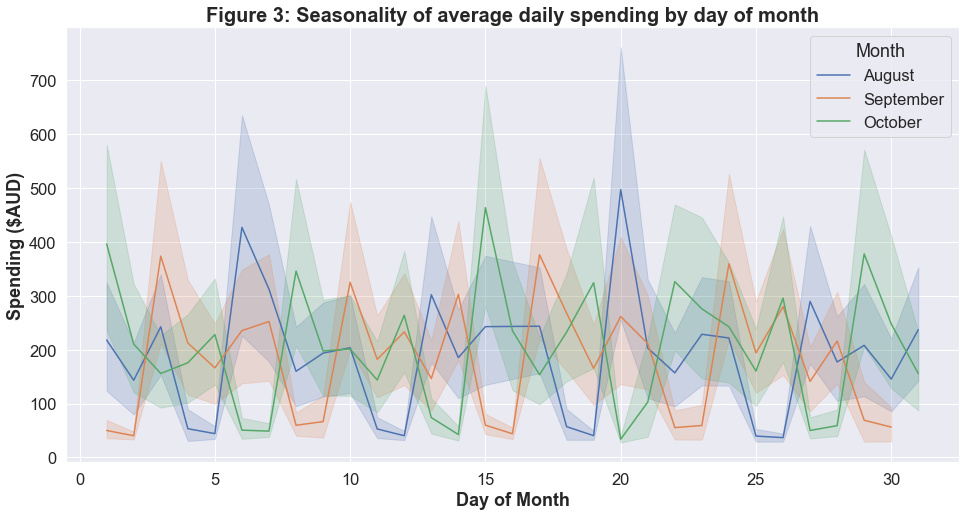

In [31]:
# Plot monthly seasonality of daily spending to spot any recurring trends
fig3, ax3 = plt.subplots(figsize=(16,8))

t = sns.lineplot(data=df, x=df.dayofmonth, y=df.amount, hue=df.month)
t.legend(title="Month")
_ = ax3.set_title('Figure 3: Seasonality of average daily spending by day of month', 
                   fontsize=20, loc='center', fontdict=dict(weight='bold'))
_ = ax3.set_xlabel('Day of Month', fontdict=dict(weight='bold'))
_ = ax3.set_ylabel('Spending ($AUD)', fontdict=dict(weight='bold'))

* The figure above stacks the average daily spending of every day of month within all three months. It can be seen that there are fluctuating seasonal patterns. However, the patterns are not predictable according to daily or monthly period. We can infer that the patterns observed can be correlated to recurring and salary transactions rather than purchases. 

* This hypothesis can be confirmed in the following plot if we check the volatility of average daily spendings per month segmented by status of transactions.

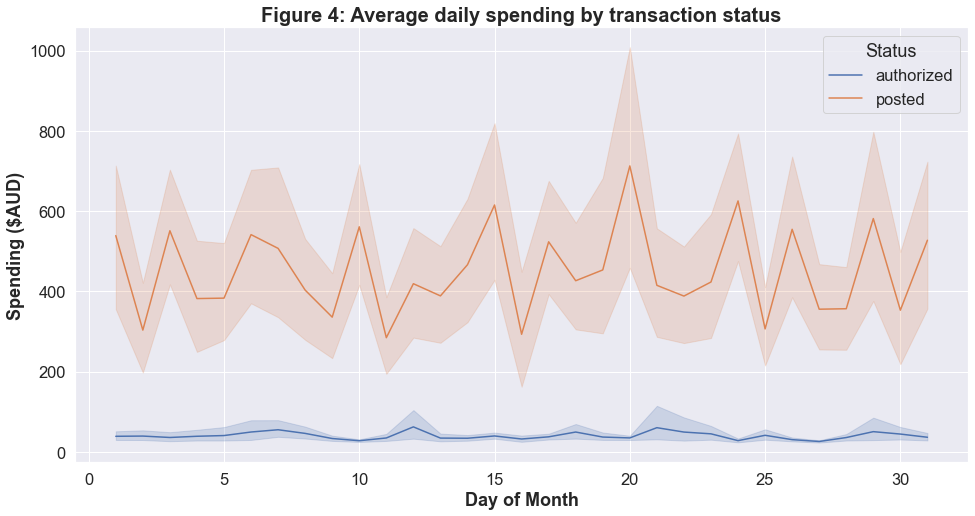

In [32]:
# Plot average daily spending by transaction status
fig4, ax4 = plt.subplots(figsize=(16,8))

f = sns.lineplot(data=df, x=df.dayofmonth, y=df.amount, hue=df.status)
f.legend(title="Status")
_ = ax4.set_title('Figure 4: Average daily spending by transaction status', 
                   fontsize=20, loc='center', fontdict=dict(weight='bold'))
_ = ax4.set_xlabel('Day of Month', fontdict=dict(weight='bold'))
_ = ax4.set_ylabel('Spending ($AUD)', fontdict=dict(weight='bold'))

* If we recognize that recurring transactions and salary transactions are functionally dependent on a posted transaction, and not an authorized one, then we can positively infer that there is a statistical significance that the volatility of transaction amounts are highly correlated with posted transactions rather than authorized ones.

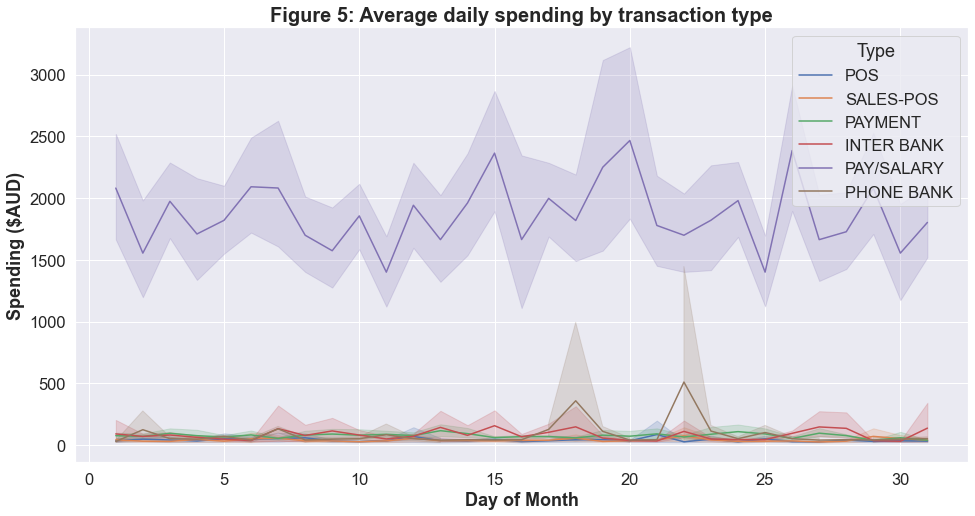

In [33]:
# Plotting seaonsal average daily spending accourding to transaction type
fig5, ax5 = plt.subplots(figsize=(16,8))

t = sns.lineplot(data=df, x=df.dayofmonth, y=df.amount, hue=df.txn_description)
t.legend(title="Type")
_ = ax5.set_title('Figure 5: Average daily spending by transaction type', 
                   fontsize=20, loc='center', fontdict=dict(weight='bold'))
_ = ax5.set_xlabel('Day of Month', fontdict=dict(weight='bold'))
_ = ax5.set_ylabel('Spending ($AUD)', fontdict=dict(weight='bold'))

* Further segmenting the transaction amounts by types reveals that salary has the most influence on seasonal volatility, even though other posted transactions have influence over voalatility. Therefore, salary transactions is a variable that is a major influence in volatility of transaction amounts and should be accounted for when graphing seasonality.

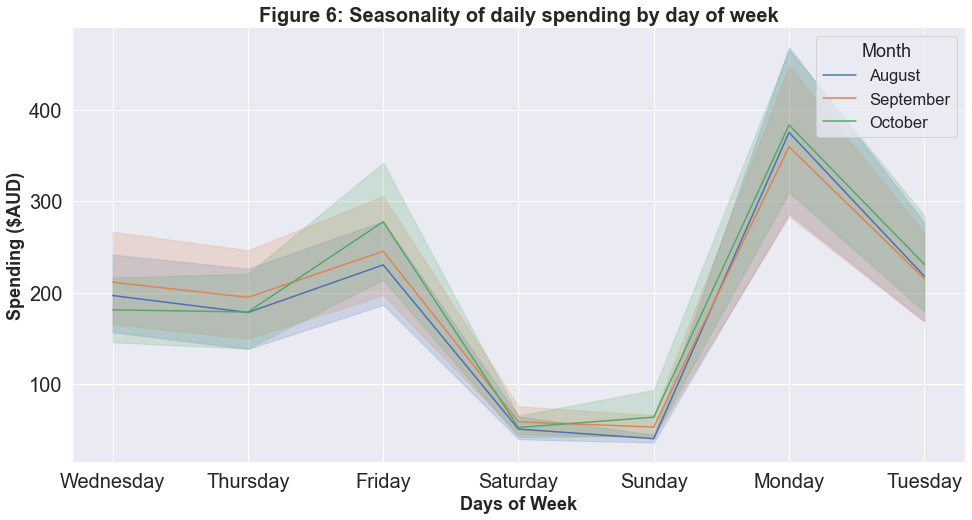

In [34]:
# Plot seaonality of daily spending by day of week
fig6, ax6 = plt.subplots(figsize=(16,8))
s = sns.lineplot(data=df, x='dayofweek', y='amount', hue='month')
s.legend(title="Month")
_ = ax6.set_title('Figure 6: Seasonality of daily spending by day of week', 
                   fontsize=20, loc='center', fontdict=dict(weight='bold'))
_ = ax6.set_xlabel('Days of Week', fontdict=dict(weight='bold'))
_ = plt.xticks(fontsize=20)
_ = ax6.set_ylabel('Spending ($AUD)', fontdict=dict(weight='bold'))
_ = plt.yticks(fontsize=20)

* Figure 6 shows that Monday is when transaction amounts peak the most. Weekends appear to have the least transaction amounts. Predictably, the other days of the week show moderate cumulative amounts.

In [35]:

dfh = df.sort_values(by=['hour'])

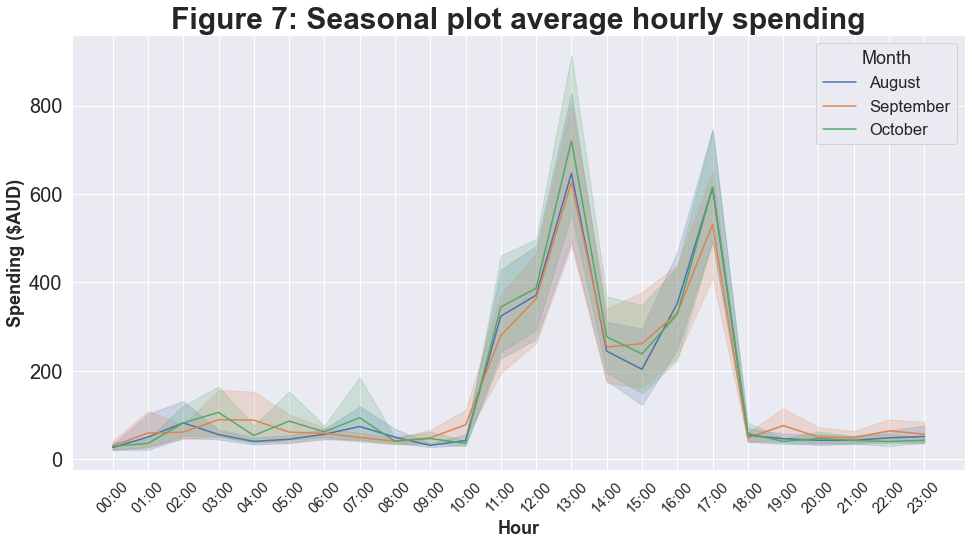

In [36]:
# Plot seasonal plot of average hourly spending by months
fig, axes = plt.subplots(figsize=(16,8))
r = sns.lineplot(data=dfh, x='hour', y='amount', hue='month')
r.legend(title="Month")
_ = axes.set_title('Figure 7: Seasonal plot average hourly spending', 
                   fontsize=30, loc='center', fontdict=dict(weight='bold'))
_ = axes.set_xlabel('Hour', fontdict=dict(weight='bold'))
_ = plt.xticks(fontsize=15, rotation=45)
_ = axes.set_ylabel('Spending ($AUD)', fontdict=dict(weight='bold'))
_ = plt.yticks(fontsize=20)

* Figure 7 shows that large transaction amounts happen in the after noon at approximately 13:00 o' clock. The amounts peak again at 17:00 o' clock and settle down in the evening.

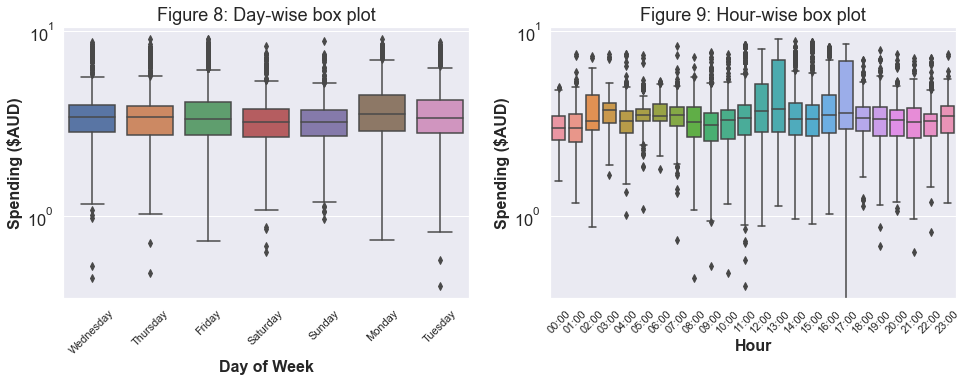

In [37]:
# Plot box plot distributions of spending for days of week and hours on a log scale
fig8, ax8 = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.boxplot(data=df, x='dayofweek', y=amount_log, ax=ax8[0])
_ = plt.sca(ax8[0])
_ = plt.xticks(fontsize=11, rotation=45)

amount_log_hour = np.log(dfh.amount)
sns.boxplot(data=dfh, x='hour', y=amount_log_hour, ax=ax8[1])
_ = plt.sca(ax8[1])
_ = plt.xticks(fontsize=11, rotation=45)
_ = ax8[0].set_xlabel('Day of Week', fontsize=16, fontdict=dict(weight='bold'))
_ = ax8[0].set_ylabel('Spending ($AUD)', fontsize=16, fontdict=dict(weight='bold'))
_ = ax8[0].set_yscale('log')
_ = ax8[0].set_title('Figure 8: Day-wise box plot')
_ = ax8[1].set_xlabel('Hour', fontsize=16, fontdict=dict(weight='bold'))
_ = ax8[1].set_ylabel('Spending ($AUD)', fontsize=16, fontdict=dict(weight='bold'))
_ = ax8[1].set_yscale('log')
_ = ax8[1].set_title('Figure 9: Hour-wise box plot')

* The saturation of the box plots reflect the previous seasonality plots of the same periods.
* It is useful to note that the above box plots have a y scale that is log transformed, hence making this positively skewed distribution look like there are a lot of negative outliers.
* The box plots above demonstrate that even if the IQR of a significant estimate like 17:00 o'clock can seem to be a major peak in the amount of large positive spending amounts, the extreme cases are still hard to account for given their contextual probability of occurences.
* For example, large amount of negative transactions may be due to over-withdrawals whereas many large positive transaction amounts are due to salary or recurring transactions

In [38]:
# Create dataframe by the counts of day of month grouping
df_dom = df.groupby('dayofmonth').count()
df_dom['amount'] = df.groupby('dayofmonth')['amount'].mean()

# Create dataframe by the counts of hours grouping
df_h = df.groupby('hour').count()
df_h['amount'] = df.groupby('hour')['amount'].mean()

Text(0.5, 0.98, 'Figure 10: Scatter plot of spending vs volume by day of month')

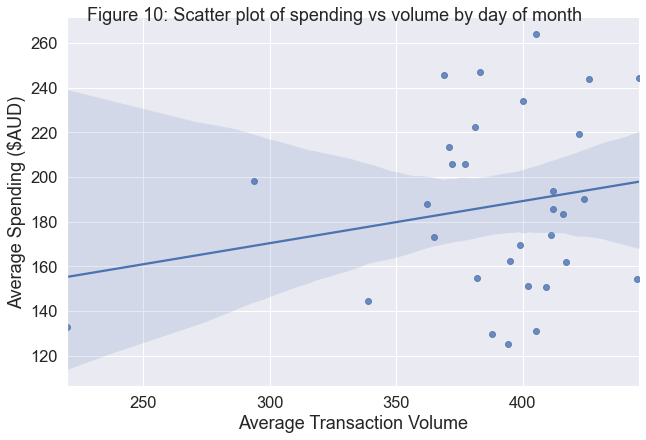

In [39]:
# Create scatter plot of transaction volume vs spending (amount) by the day of month
g = sns.lmplot(x='date', y='amount', data=df_dom, height=6, aspect=1.5)
g.set_axis_labels('Average Transaction Volume', 'Average Spending ($AUD)')
g.fig.suptitle("Figure 10: Scatter plot of spending vs volume by day of month",
                  fontsize=18, fontdict={"weight": "bold"})

* Figure 10 shows that there is some positive correlation between transaction spending and volume accross daily spending averages per month

Text(0.5, 0.98, 'Figure 11: Scatter plot of spending vs volume by hour')

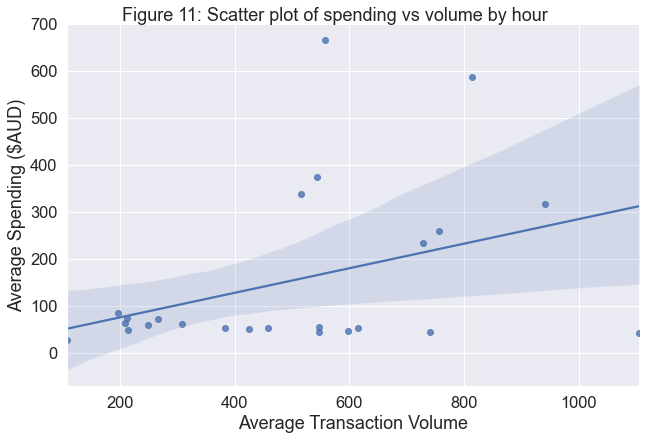

In [40]:
h = sns.lmplot(x='date', y='amount', data=df_h, height=6, aspect=1.5)
h.set_axis_labels('Average Transaction Volume', 'Average Spending ($AUD)')
h.fig.suptitle("Figure 11: Scatter plot of spending vs volume by hour",
                  fontsize=18, fontdict={"weight": "bold"})

* Figure 11 shows that there is some positive correlation between transaction spending and volume accross hour spending averages per day
* The slope of the line of best fit is steeper than the line in Figure 10. That is because the more volume that is calculated accross daily averages, the more normality is reached from the calculation, as per the Central Limit Theorem.

##  Step 4: Making sense of location data
* In this activity, I will use the new feature I engineered called distance. Essentially, distance field was taken from using the formula for nautical miles for two given geographical coordinates, then converting to kilometers. For full explanation of the formula, please refer to the readme file of this project

In [41]:
import pandas as pd
# importing display tools in Python
from IPython.display import display
# import folium libraries for plotting markers
import folium
from folium.plugins import MeasureControl
from folium.plugins import HeatMap
# import random module to draw samples
import random
import re

In [42]:
# Create a function for generating a basic map centered on Australia
def generateBaseMap(default_location=[-23.877610095191628, 135.01297734173076], tiles='OpenStreetMap', default_zoom_start=4):
    '''
    Create a map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    return base_map

In [43]:
m = generateBaseMap()

In [44]:
# Combine all geometric information and assign it to variable   coordinates
coordinates = list(zip(df.X, df.Y, df.first_name.values, df.distance.values, df.txn_description.values, df.merch_X, df.merch_Y))
# Take a random sample for payee_loc as plotting all columns will overload memory access
samples = random.sample(coordinates, 30)
# create a feature group named fg to layer onto the main map display
fg = folium.FeatureGroup(name="markers")
# input the marker parameters in the form of a loop to allocate coordinates for 100 rows
# popup param is assigned incident descript
for i in samples:
  popup = i[2] + '\n' + str(i[3]) + 'km\n' + i[4]
  fg.add_child(folium.Marker(location=[i[0], i[1]], popup=popup, 
                              icon=folium.Icon(color='blue')))
  fg.add_child(folium.Marker(location=[i[5], i[6]], popup=popup, 
                              icon=folium.Icon(color='red')))
# generate a basic map with variable map_name

# Add the markers feature group showing payee and merchant locations
m.add_child(fg)
m.add_child(MeasureControl())
m

*NOTE*
* The map above takes a sample of 30 coordinates where the locations are functionally dependent on the same transactions. That is, 30 payee locations will correspond functionally to 30 merchant locations
* The Measurement Control widget can be used to draw lines between corresponding transactions according to the details presented. i.e. (name, distance, type)
* Two linear measurements are plotted in the Open Street Map above by default. One for feature groups (Nathaniel, 3212.21 km, POS) and one for (Ruth, 51.91 km, POS).
* Transactions with 0 distance should be ignored. Usually it means that it is a posted transaction. I.e. it is either a recurring or salary transaction done over phone or internet.
* Transactions done for overseas locations are usually posted transactions.
* Majority of thr transaction samples are local transactions

## Step 5: Understanding the customer journey, literally
* To understand a particular customers transaction history. A particular subset of colocations can be sliced for a particular customer. For instance, we can use our created function to plot the subset that only contains first name of Ruth, like so:

In [45]:
# subset for all values for customer with first name Ruth
ruth = df[df.first_name == 'Ruth']
# change ruth timestamps to string
ruth.index = ruth.index.strftime('%d/%m/%Y, %H:%M').astype(str)

# generate new map
mRuth = generateBaseMap()

# Combine all geometric information and assign it to variable   coordinates
coordinates = list(zip(ruth.X, ruth.Y, ruth.index.values, ruth.first_name.values, ruth.txn_description.values, ruth.merch_X, ruth.merch_Y))
# Take a random sample for payee_loc as plotting all columns will overload memory access
samples = random.sample(coordinates, 30)
# create a feature group named fg to layer onto the main map display
fg = folium.FeatureGroup(name="markers")
# input the marker parameters in the form of a loop to allocate coordinates for 100 rows
# popup param is assigned incident descript
for i, j in enumerate(samples):
  popup = j[3] + '@' + j[2] + ',\n' + 'Stop: ' + str(i) + '\n' + j[4]
  fg.add_child(folium.Marker(location=[j[0], j[1]], popup=popup, 
                              icon=folium.Icon(color='blue')))
  fg.add_child(folium.Marker(location=[j[5], j[6]], popup=popup, 
                              icon=folium.Icon(color='red')))
# generate a basic map with variable map_name

# Add the markers feature group showing payee and merchant locations
mRuth.add_child(fg)
mRuth.add_child(MeasureControl())
mRuth

* Using the Measure Control widget, you are able to trace where the customer might have been
* The map of Ruth's customer journey as noted above enables us to make guesses on how she normally conducts her transactions
* If there are areas that are highly concertrated that are within the same transactional period, then it is likely she is making cash transactions.
* This can be beneficial to understanding our customer behaviour and how they make purchases according to their location and time of day

In [46]:
# Generate a new map
heat_map = generateBaseMap()
print('heat_map successfully created')

# Create a feature group for heat map
print("Applying HeatMap feature to new map...")

# calculate coordinates for payees only
payee_coordinates = list(zip(df.X, df.Y))
merch_coordinates = list(zip(df.merch_X, df.merch_Y))
tot_coordinates = payee_coordinates + merch_coordinates

# list comprehension for longitudes and latitudes
heat_data = [list(ele) for ele in tot_coordinates]

# slice first 100 rows for heatmap data
heat_data = heat_data[:100]

print("Adding heat data to heat map for first 100 rows")
HeatMap(heat_data).add_to(heat_map)

# display heat map
heat_map

heat_map successfully created
Applying HeatMap feature to new map...
Adding heat data to heat map for first 100 rows


* Heat Map above demonstrates that even though many purchase transactions happen online or over the phone, many non-recurring transactions have a heavy concentration in the metropolitan areas

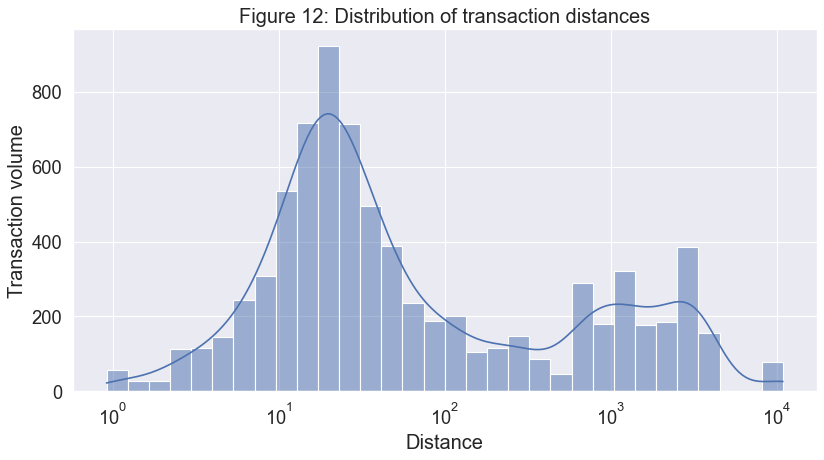

In [47]:
# Get rid of the zeroes in distance column for the following log transformation
df = df[df['distance'] != 0]
# Make a figure using matplotlib
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
# set font size in sns
sns.set(font_scale=1.5)
# plot a histogram using an adjusted logscale and probability density curve
sns.histplot(data=df, x='distance', log_scale=True, kde=True)
_ = plt.title('Figure 12: Distribution of transaction distances')
_ = plt.xlabel('Distance')
_ = plt.ylabel('Transaction volume')

* Figure 12 shows a similar distribution to the amount histogram in Figure 1.
* The two-peaked distribution suggest that rare transactions that happen over large distances tend to be of a similar type

In [69]:
# find the log transform of amount to deal with skewness
amount_log = np.log(df.amount)
amount_log.skew()


0.8195534439489313

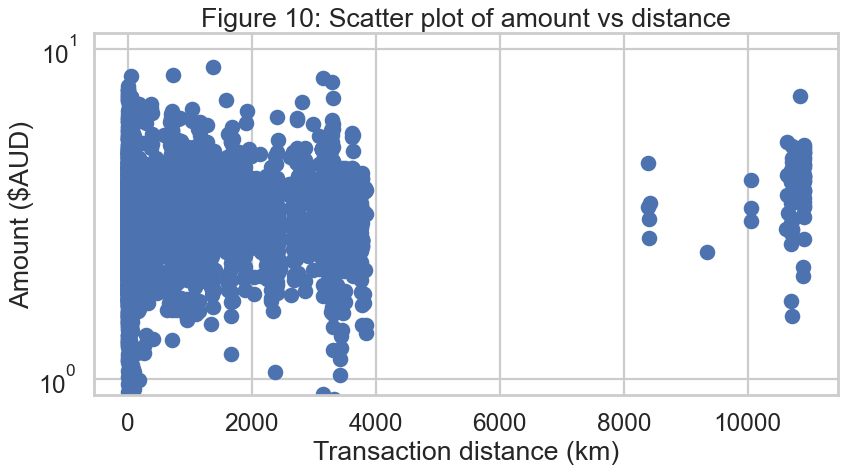

In [70]:
# Create scatter plot for amount versus distance
fig = plt.figure(figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
_ = plt.scatter(x=df.distance, y=amount_log)
_ = plt.title('Figure 10: Scatter plot of amount vs distance')
_ = plt.xlabel('Transaction distance (km)')
_ = plt.ylabel('Amount ($AUD)')
_ = plt.yscale('log')

* Figure 10 shows that there is not much correlation between distance and amount, even after the log transform

In [51]:
# subset data for Ruth into a new dataframe for plotting
data = ruth[['amount', 'balance', 'distance', 'txn_description']]

In [71]:
# Check DataFrame columns for Ruth
ruth.columns

Index(['status', 'card_present_flag', 'first_name', 'age', 'gender',
       'txn_description', 'balance', 'amount', 'geometry', 'X', 'Y',
       'merch_suburb', 'merch_state', 'merch_geometry', 'merch_X', 'merch_Y',
       'distance', 'card_present_bool', 'month', 'date', 'dayofmonth', 'hour',
       'minute', 'second', 'dayofweek'],
      dtype='object')

In [53]:
# log transform Ruth's transaction amounts
amount_log = np.log(ruth.amount)
amount_log.skew()

1.2241479108745936

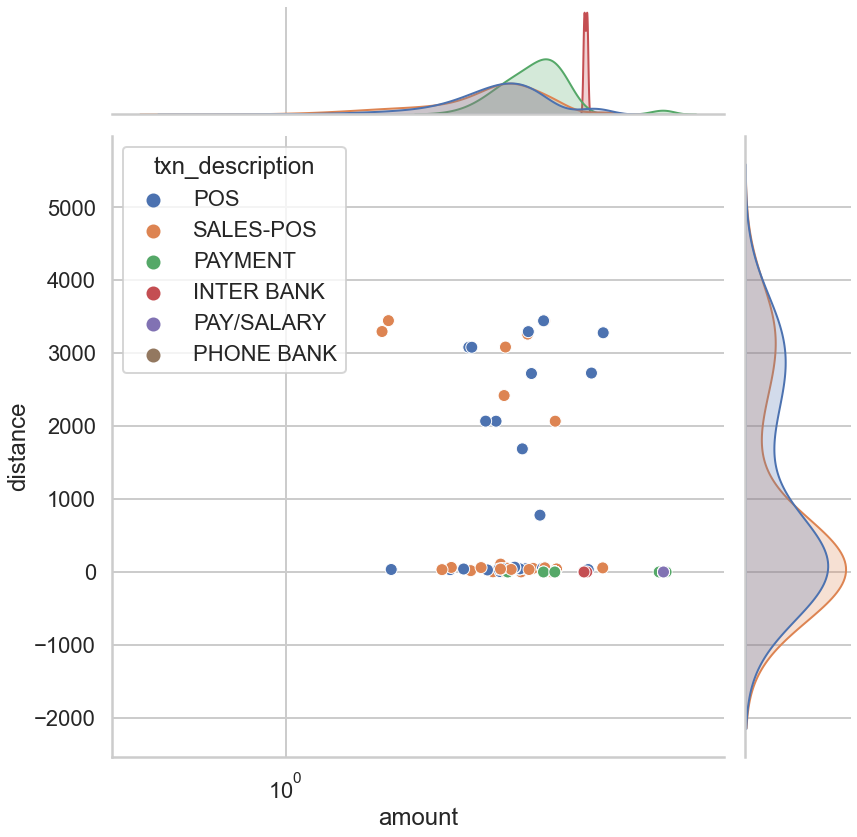

In [67]:
# Make a pairplot
sns.set_style('whitegrid')
sns.set_context("poster")
g = sns.jointplot(data=ruth, x=amount_log, y='distance', hue='txn_description', height=12)
g.ax_joint.set_xscale('log')


* Plot above shows that Ruth usually has authorized purchases that go past the $3000 AUD mark.
* Ruth has few recurring and salary transactions compared to her authorized purchases.
* Ruth Probably uses Internet Banking conservatively, and would probably be more comfortable over the phone when making payments